In [7]:
#loading Us population dataset in 2020 and 2024

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from DataframeHandler import DataFrameHandler as dfh
import numpy as np
df = dfh.read_csv_file("uspopulation2024.csv")
dfh.describe_data(df)

df['Annual Change(%)'] = ((df['Population 2024'] - df['Population 2020']) / df['Population 2020']) * 100
df['Annual Change(%)']

,# Column,Column name,Non-Null Count,Missing,Dtype
0,#,Column,Non-Null,Count,Dtype
1,---,------,--------------,-----,
2,0,Rank,300,non-null,int64
3,1,US,City,300,non-null
4,2,US,State,300,non-null
5,3,Population,2024,300,non-null
6,4,Population,2020,300,non-null
7,5,Annual,Change,300,non-null
8,6,Density,(/mile2),300,non-null
9,7,Area,(mile2),300,non-null



Number of rows and columns:
Number of rows: 300
Number of columns: 8

DataFrame Description:


,Rank,Population 2024,Population 2020,Annual Change,Density (/mile2),Area (mile2)
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,150.500000,315577.406667,316102.000000,0.002964,4093.860000,100.978833
std,86.746758,578032.607566,610422.711417,0.012350,3279.190974,139.119369
min,1.000000,110055.000000,91255.000000,-0.025400,167.000000,6.400000
25%,75.750000,131916.000000,126433.250000,-0.005050,2197.500000,37.765000
50%,150.500000,180161.000000,177693.500000,0.000750,3340.500000,61.690000
75%,225.250000,282621.000000,279274.250000,0.008100,4682.250000,110.532500
max,300.000000,8097282.000000,8740292.000000,0.058000,26950.000000,1707.000000



Sum of null values in each column:


,Null Counts
Rank,0
US City,0
US State,0
Population 2024,0
Population 2020,0
Annual Change,0
Density (/mile2),0
Area (mile2),0


0     -7.356848
1     -2.564576
2     -3.833663
3      0.863318
4      3.110033
         ...   
295    0.712119
296   -0.979455
297    1.755917
298   -0.909605
299    0.248675
Name: Annual Change(%), Length: 300, dtype: float64


<h1>Loading US Population Dataset in 2020 and 2024</h1>
<p>This code cell loads and analyzes a dataset of US population data for the years 2020 and 2024.</p>
<h2>Data Loading</h2>
<p>First, we import the necessary libraries:</p>
<ul>
  <li><code>pandas</code> for data manipulation</li>
  <li><code>seaborn</code> and <code>matplotlib.pyplot</code> for data visualization</li>
  <li><code>DataFrameHandler</code> (from the <code>DataframeHandler</code> module) for handling the DataFrame</li>
</ul>
<p>We then use the <code>read_csv_file</code> method from <code>DataFrameHandler</code> to read the CSV file <code>"uspopulation2024.csv"</code> into a pandas DataFrame <code>df</code>.</p>
<h2>Data Description</h2>
<p>Next, we call the <code>describe_data</code> method from <code>DataFrameHandler</code> to get an overview of the data, including the number of rows and columns, data types, and null value counts.</p>
<h2>Calculated Column</h2>
<p>We then create a new column <code>'Annual Change(%)'</code> in the DataFrame, which calculates the annual percentage change in population from 2020 to 2024.</p>
<p>The formula used is:</p>
<pre><code>'Annual Change(%)' = ((df['Population 2024'] - df['Population 2020']) / df['Population 2020']) * 100</code></pre>
<p>This new column provides insights into the rate of population change over the 4-year period.</p>
<h2>Usage</h2>
<p>To use this code, you would need to have the <code>"uspopulation2024.csv"</code> file available in your working directory. The code will load the data, describe the DataFrame, and create a new column <code>'Annual Change(%)'</code> that you can then use for further analysis or visualization.</p>

In [8]:
df.head()

,Rank,US City,US State,Population 2024,Population 2020,Annual Change,Density (/mile2),Area (mile2),Annual Change(%)
0,1,New York,New York,8097282,8740292,-0.0195,26950,300.46,-7.356848
1,2,Los Angeles,California,3795936,3895848,-0.0065,8068,470.52,-2.564576
2,3,Chicago,Illinois,2638159,2743329,-0.0099,11584,227.75,-3.833663
3,4,Houston,Texas,2319119,2299269,0.0021,3620,640.61,0.863318
4,5,Phoenix,Arizona,1662607,1612459,0.0076,3208,518.33,3.110033


<h1>Set the Number of Top Cities to Display</h1>
<p>This code cell filters the DataFrame to display the top N cities by rank and creates a pivot table to visualize the data.</p>
<h2>Code Breakdown</h2>
<ol>
  <li><strong>Set the number of top cities</strong>: The <code>N</code> variable is set to <code>10</code>, which means the code will display the top 10 cities by rank.</li>
  <li><strong>Filter the top N cities</strong>: The <code>top_n_cities</code> DataFrame is created by filtering the original <code>df</code> DataFrame to include only the rows where the 'Rank' column is less than or equal to <code>N</code> (10).</li>
  <li><strong>Create the pivot table</strong>: The <code>pivot_table_top_n_cities</code> DataFrame is created using the <code>pd.pivot_table()</code> function. The pivot table is created with the following parameters:
    <ul>
      <li><code>values</code>: The columns to be aggregated, in this case, 'Population 2024' and 'Rank'.</li>
      <li><code>index</code>: The column to be used as the row index, in this case, 'US City'.</li>
      <li><code>aggfunc</code>: The aggregation function to be used, in this case, 'sum'.</li>
    </ul>
  </li>
  <li><strong>Display the pivot table</strong>: The pivot table is printed to the console.</li>
</ol>
<h2>Usage</h2>
<p>To use this code, you would need to have the <code>df</code> DataFrame already loaded and available in your environment. The code will filter the DataFrame to display the top 10 cities by rank and create a pivot table to visualize the 'Population 2024' and 'Rank' data for those cities.</p>
<p>You can adjust the <code>N</code> variable to change the number of top cities displayed. For example, setting <code>N = 20</code> would display the top 20 cities.</p>

In [9]:


# Set the number of top cities you want to display
N = 10

# Filter the top N cities by Rank
top_n_cities = df[df['Rank'] <= N]

# Create the pivot table
pivot_table_top_n_cities = pd.pivot_table(
    top_n_cities,
    values=['Population 2024','Rank'],
    index='US City',
    aggfunc='sum'
)

# Display the pivot table
print(pivot_table_top_n_cities)


              Population 2024  Rank
US City                            
Chicago               2638159     3
Dallas                1302753     9
Houston               2319119     4
Jacksonville           997164    10
Los Angeles           3795936     2
New York              8097282     1
Philadelphia          1533828     6
Phoenix               1662607     5
San Antonio           1513974     7
San Diego             1388996     8


<h1>Plot the Bar Chart</h1>
<p>This code cell creates a bar chart to visualize the top N cities by population in 2024.</p>
<h2>Code Breakdown</h2>
<ol>
  <li><strong>Create a new figure</strong>: The <code>plt.figure()</code> function is used to create a new figure with a specific size (8x4 inches).</li>
  <li><strong>Create the bar chart</strong>: The <code>sns.barplot()</code> function from the Seaborn library is used to create the bar chart. The following parameters are used:
    <ul>
      <li><code>data</code>: The <code>pivot_table_top_n_cities</code> DataFrame that was created in the previous cell.</li>
      <li><code>x</code>: The column to use for the x-axis, which is 'US City'.</li>
      <li><code>y</code>: The column to use for the y-axis, which is 'Population 2024'.</li>
      <li><code>color</code>: The color of the bars, set to 'teal'.</li>
    </ul>
  </li>
  <li><strong>Set the y-axis limits and ticks</strong>: The <code>plt.ylim()</code> function is used to set the y-axis limits to a range of 90,000 to 9,000,000. The <code>np.arange()</code> function is used to create the y-axis ticks with a spacing of approximately 1.5 million.</li>
  <li><strong>Add labels and title</strong>: The <code>plt.title()</code> function is used to add a title to the plot, which includes the value of the <code>N</code> variable. The <code>ax.spines[]</code> functions are used to remove the borders of the plot.</li>
  <li><strong>Rotate the x-axis labels</strong>: The <code>plt.xticks(rotation=90)</code> function is used to rotate the x-axis labels by 90 degrees.</li>
  <li><strong>Save the plot</strong>: The <code>plt.savefig()</code> function is used to save the plot to a file named 'population_comparison.png' with a resolution of 600 dpi and tight bounding box.</li>
  <li><strong>Display the plot</strong>: The <code>plt.show()</code> function is used to display the plot.</li>
</ol>
<h2>Usage</h2>
<p>To use this code, you would need to have the <code>pivot_table_top_n_cities</code> DataFrame already created and available in your environment. The code will create a bar chart that visualizes the top N cities by population in 2024.</p>
<p>You can adjust the <code>N</code> variable to change the number of cities displayed in the chart. For example, setting <code>N = 20</code> would display the top 20 cities.</p>
<p>The plot will be saved to a file named 'population_comparison.png' in the current working directory, and it will also be displayed in the Jupyter Notebook.</p>

In [ ]:
# Plot the bar chart
plt.figure(figsize=(8, 4))
ax = sns.barplot(
    data=pivot_table_top_n_cities,
    x='US City',
    y='Population 2024',
    color='teal'  # Set the color of the bars
)

# Add labels and title
plt.ylim(90000, 9000000)  # Set the y-axis limits
y_min, y_max = plt.ylim()
y_ticks = np.arange(y_min, y_max + 1, (y_max - y_min) / 6)  # Adjust the number of ticks as needed
plt.yticks(y_ticks, [f'{int(tick/1000000):,}M' for tick in y_ticks]) 
plt.title(f'Top {N} Cities by Population in 2024', loc='right', pad=2) 

ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(rotation=90)
plt.savefig('population_comparison.png', dpi=600, bbox_inches='tight')


# Show plot
plt.show()


<h1>Create a Pivot Table of Population Data by State</h1>
<p>This code cell creates a pivot table that aggregates the population data for the years 2020 and 2024, as well as the annual percentage change, grouped by US state.</p>
<h2>Code Breakdown</h2>
<ol>
  <li><strong>Create the pivot table</strong>: The <code>pd.pivot_table()</code> function is used to create the pivot table with the following parameters:
    <ul>
      <li><code>data</code>: The original <code>df</code> DataFrame.</li>
      <li><code>values</code>: The columns to be aggregated, which are 'Population 2024', 'Population 2020', and 'Annual Change(%)'.</li>
      <li><code>index</code>: The column to be used as the row index, which is 'US State'.</li>
      <li><code>aggfunc</code>: A dictionary that specifies the aggregation function for each value column:
        <ul>
          <li>'Population 2024': 'sum'</li>
          <li>'Population 2020': 'sum'</li>
          <li>'Annual Change(%)': 'mean'</li>
        </ul>
      </li>
    </ul>
  </li>
  <li><strong>Display the pivot table</strong>: The pivot table is printed to the console using the <code>print()</code> function.</li>
</ol>
<h2>Resulting Pivot Table</h2>
<p>The resulting pivot table will have the following structure:</p>
<ul>
  <li><strong>Index</strong>: The 'US State' column, which will be the rows of the pivot table.</li>
  <li><strong>Columns</strong>:
    <ul>
      <li>'Population 2024': The sum of the 2024 population for each state.</li>
      <li>'Population 2020': The sum of the 2020 population for each state.</li>
      <li>'Annual Change(%)': The mean of the annual percentage change for each state.</li>
    </ul>
  </li>
</ul>
<h2>Usage</h2>
<p>To use this code, you would need to have the <code>df</code> DataFrame already loaded and available in your environment. The code will create the pivot table and display it in the Jupyter Notebook.</p>
<p>The pivot table can be used for further analysis, such as visualizing the population trends by state or identifying the states with the highest or lowest population growth rates

In [11]:
pivot_table_population_by_state = pd.pivot_table(
   df,
    values=['Population 2024', 'Population 2020', 'Annual Change(%)'],
    index=['US State'],
    aggfunc={'Population 2024': 'sum', 'Population 2020': 'sum', 'Annual Change(%)': 'mean'}
)

# Display the pivot table
print(pivot_table_population_by_state)


                      Annual Change(%)  Population 2020  Population 2024
US State                                                                
Alabama                       1.244682           907661           912682
Alaska                       -2.208372           290893           284469
Arizona                       6.294626          4411668          4569930
Arkansas                      0.794536           202634           204244
California                   -0.984738         18563156         18244451
Colorado                      0.559134          2515232          2536955
Connecticut                   1.580621           646614           656770
District of Columbia          1.616483           670839           681683
Florida                       4.876282          5136504          5396156
Georgia                       0.497273          1448848          1460238
Hawaii                       -2.195685           347181           339558
Idaho                        11.283593           45

<h1>Draw Line Plot for US Famous States</h1>
<p>This code cell creates a line plot to visualize the population growth between 2020 and 2024 for a selection of US states.</p>
<h2>Code Breakdown</h2>
<ol>
  <li><strong>Select the states</strong>: A list of 5 selected states is created: 'California', 'Texas', 'Florida', 'New York', and 'Illinois'.</li>
  <li><strong>Filter the pivot table</strong>: The <code>pivot_table_population_by_state</code> DataFrame is filtered to include only the selected states, and the 'US State' column is reset as the index.</li>
  <li><strong>Sort the filtered pivot table</strong>: The filtered pivot table is sorted by the 'US State' column to ensure a better visualization.</li>
  <li><strong>Create the line plot</strong>: A new figure is created with a size of 14x8 inches. Two line plots are created using the <code>sns.lineplot()</code> function:
    <ul>
      <li>The first line plot shows the 'Population 2024' data, using 'US State' as the x-axis and 'Population 2024' as the y-axis. Markers are added to the line.</li>
      <li>The second line plot shows the 'Population 2020' data, using the same x and y axes. Markers are also added to this line.</li>
    </ul>
  </li>
  <li><strong>Add labels and title</strong>: A title, x-axis label, and y-axis label are added to the plot. The legend is positioned in the upper-left corner. The x-axis labels are rotated by 90 degrees for better readability.</li>
  <li><strong>Display the plot</strong>: The <code>plt.show()</code> function is used to display the line plot.</li>
</ol>
<h2>Usage</h2>
<p>To use this code, you would need to have the <code>pivot_table_population_by_state</code> DataFrame already created and available in your environment. The code will create a line plot that shows the population growth between 2020 and 2024 for the selected states.</p>
<p>You can modify the <code>selected_states</code> list to include different states or a different number of states. The line plot will be updated accordingly.</p>
<p>The resulting plot can be used to compare the population trends for the selected states and identify any significant changes or differences in their population growth over the 4-year period.

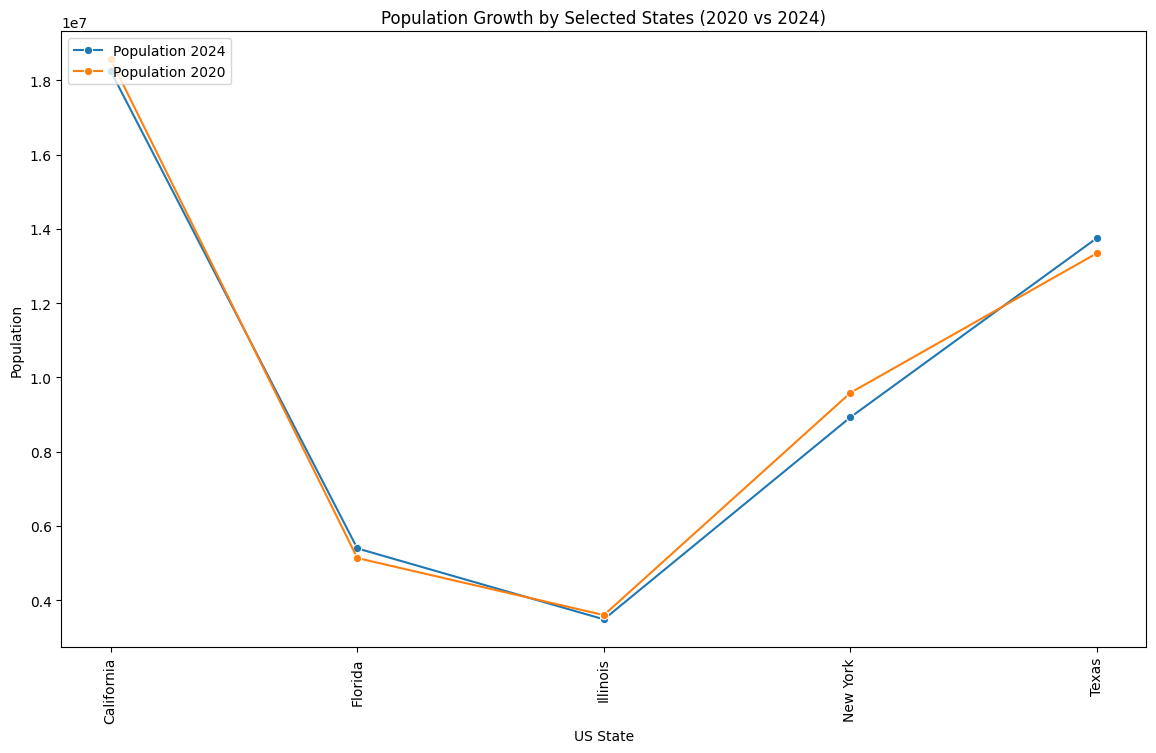

In [12]:
#we draw lineplot for US famous states
selected_states = ['California', 'Texas', 'Florida', 'New York', 'Illinois']

# Filter the pivot table for the selected states
filtered_pivot_table = pivot_table_population_by_state.loc[selected_states].reset_index()

# Sort the filtered pivot table by state for better visualization
filtered_pivot_table.sort_values('US State', inplace=True)

# Plot the line chart
plt.figure(figsize=(14, 8))

# Plot Population 2024
sns.lineplot(
    x='US State', 
    y='Population 2024', 
    data=filtered_pivot_table, 
    marker='o', 
    label='Population 2024'
)

# Plot Population 2020
sns.lineplot(
    x='US State', 
    y='Population 2020', 
    data=filtered_pivot_table, 
    marker='o', 
    label='Population 2020'
)


# Add labels and title
plt.title('Population Growth by Selected States (2020 vs 2024)')
plt.xlabel('US State')
plt.ylabel('Population')
plt.legend(loc='upper left')
plt.xticks(rotation=90)

# Show plot
plt.show()

<h1>Create a Grouped Bar Plot for Selected States</h1>
<p>This code cell creates a grouped bar plot to compare the population of selected states in 2020 and 2024.</p>
<h2>Code Breakdown</h2>
<ol>
  <li><strong>Filter the pivot table</strong>: The <code>pivot_table_population_by_state</code> DataFrame is filtered to include only the selected states, and the 'US State' column is reset as the index.</li>
  <li><strong>Melt the DataFrame</strong>: The <code>filtered_pivot_table</code> is melted using the <code>melt()</code> function to create a long-format DataFrame with the following structure:
    <ul>
      <li><code>US State</code>: The state name</li>
      <li><code>Year</code>: Either '2024' or '2020'</li>
      <li><code>Population</code>: The population value for the corresponding state and year</li>
    </ul>
  </li>
  <li><strong>Create the grouped bar plot</strong>: A new figure is created with a size of 8x4 inches. The <code>sns.barplot()</code> function is used to create the grouped bar plot, with the following parameters:
    <ul>
      <li><code>x</code>: The 'US State' column</li>
      <li><code>y</code>: The 'Population' column</li>
      <li><code>hue</code>: The 'Year' column, which will be used to group the bars by year</li>
      <li><code>data</code>: The <code>melted_df</code> DataFrame</li>
      <li><code>palette</code>: The 'viridis' color palette is used to color the bars</li>
    </ul>
  </li>
  <li><strong>Customize the plot appearance</strong>: The following customizations are applied to the plot:
    <ul>
      <li>A title, x-axis label, and y-axis label are added</li>
      <li>The y-axis limits are set to a range of 90,000 to 9,000,000, and the y-axis ticks are adjusted accordingly</li>
      <li>The x-axis labels are rotated by 45 degrees for better readability</li>
      <li>The top, right, and left borders of the plot are removed</li>
    </ul>
  </li>
  <li><strong>Save the plot</strong>: The plot is saved to a file named 'population_comparison_states.png' with a resolution of 300 dpi and a tight bounding box.</li>
  <li><strong>Display the plot</strong>: The <code>plt.show()</code> function is used to display the grouped bar plot.</li>
</ol>
<h2>Usage</h2>
<p>To use this code, you would need to have the <code>pivot_table_population_by_state</code> DataFrame already created and available in your environment. The code will create a grouped bar plot that compares the population of the selected states in 2020 and 2024.</p>
<p>You can modify the <code>selected_states</code> list to include different states or a different number of states. The bar plot will be updated accordingly.</p>
<p>The resulting plot can be used to visually compare the population changes between the selected states over the 4-year period. The grouped bars allow for easy comparison of the 2020 and 2024 values for each state.</p>

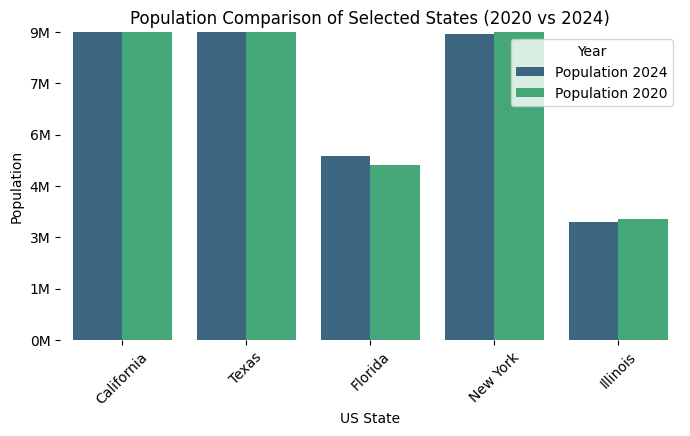

In [13]:

filtered_pivot_table = pivot_table_population_by_state.loc[selected_states].reset_index()
melted_df = filtered_pivot_table.melt(id_vars='US State', 
                                      value_vars=['Population 2024', 'Population 2020'], 
                                      var_name='Year', 
                                      value_name='Population')

# Create the grouped bar plot
plt.figure(figsize=(8,4))
sns.barplot(x='US State', y='Population', hue='Year', data=melted_df, palette='viridis')

# Customize plot appearance
plt.title('Population Comparison of Selected States (2020 vs 2024)')
plt.xlabel('US State')
plt.ylabel('Population')
plt.legend(title='Year')

plt.ylim(90000, 9000000)  # Set the y-axis limits
y_min, y_max = plt.ylim()
y_ticks = np.arange(y_min, y_max + 1, (y_max - y_min) / 6)  # Adjust the number of ticks as needed
plt.yticks(y_ticks, [f'{int(tick/1000000):,}M' for tick in y_ticks]) 
plt.xticks(rotation=45)
plt.legend(title='Year')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)



# Save the plot as a high-resolution image
plt.savefig('population_comparison_states.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()

In [ ]:
<h1>Check the Sum of Population for Famous California Cities</h1>
<p>This code cell creates a pivot table to analyze the population data for cities in the state of California.</p>
<h2>Code Breakdown</h2>
<ol>
  <li><strong>Filter the DataFrame for California</strong>: The original <code>df</code> DataFrame is filtered to include only the rows where the 'US State' column is 'California'. This creates a new DataFrame called <code>california_df</code>.</li>
  <li><strong>Create the pivot table</strong>: The <code>pd.pivot_table()</code> function is used to create a pivot table with the following parameters:
    <ul>
      <li><code>data</code>: The <code>california_df</code> DataFrame.</li>
      <li><code>values</code>: The columns to be aggregated, which are 'Population 2024', 'Population 2020', and 'Annual Change'.</li>
      <li><code>index</code>: The column to be used as the row index, which is 'US City'.</li>
      <li><code>aggfunc</code>: A dictionary that specifies the aggregation function for each value column:
        <ul>
          <li>'Population 2024': 'sum'</li>
          <li>'Population 2020': 'sum'</li>
          <li>'Annual Change': 'mean'</li>
        </ul>
      </li>
    </ul>
  </li>
  <li><strong>Display the pivot table</strong>: The <code>pivot_table_california_cities</code> DataFrame is displayed, showing the sum of the 2024 and 2020 populations, as well as the mean of the annual change, for each city in California.</li>
</ol>
<h2>Resulting Pivot Table</h2>
<p>The resulting pivot table will have the following structure:</p>
<ul>
  <li><strong>Index</strong>: The 'US City' column, which will be the rows of the pivot table.</li>
  <li><strong>Columns</strong>:
    <ul>
      <li>'Population 2024': The sum of the 2024 population for each city.</li>
      <li>'Population 2020': The sum of the 2020 population for each city.</li>
      <li>'Annual Change': The mean of the annual change for each city.</li>
    </ul>
  </li>
</ul>
<h2>Usage</h2>
<p>To use this code, you would need to have the original <code>df</code> DataFrame already loaded and available in your environment. The code will create the pivot table for the cities in California and display it in the Jupyter Notebook.</p>
<p>The pivot table can be used for further analysis, such as identifying the cities with the highest or lowest population growth rates, or visualizing the population trends for individual cities within California.</p>


In [3]:
#we want to check sum of population of famous CALIFORNIA cities

california_df = df[df['US State'] == 'California']

# Create the pivot table for cities in California
pivot_table_california_cities = pd.pivot_table(
    california_df,
    values=['Population 2024', 'Population 2020', 'Annual Change'],
    index=['US City'],
    aggfunc={
        'Population 2024': 'sum',
        'Population 2020': 'sum',
        'Annual Change': 'mean'
    }
)
pivot_table_california_cities

,Annual Change,Population 2020,Population 2024
US City,,,
Anaheim,-0.0060,346658,338463
Antioch,0.0049,115379,117668
Bakersfield,0.0065,405280,416081
Berkeley,-0.0147,124205,117214
Carlsbad,-0.0042,114924,113018
...,...,...,...
Thousand Oaks,-0.0091,126824,122342
Torrance,-0.0173,146442,136818
Vallejo,-0.0084,125894,121778


<h1>Check Famous Cities in California</h1>
<p>This code cell creates a pivot table to analyze the population data for a selected set of famous cities in the state of California.</p>
<h2>Code Breakdown</h2>
<ol>
  <li><strong>Filter the DataFrame for California</strong>: The original <code>df</code> DataFrame is filtered to include only the rows where the 'US State' column is 'California'. This creates a new DataFrame called <code>california_df</code>.</li>
  <li><strong>Define the list of famous cities</strong>: A list of 12 famous cities in California is created, including cities like Los Angeles, San Francisco, and San Diego.</li>
  <li><strong>Filter the DataFrame for the famous cities</strong>: The <code>california_df</code> is further filtered to include only the rows where the 'US City' column is in the <code>famous_cities</code> list. This creates a new DataFrame called <code>filtered_df</code>.</li>
  <li><strong>Create the pivot table</strong>: The <code>pd.pivot_table()</code> function is used to create a pivot table with the following parameters:
    <ul>
      <li><code>data</code>: The <code>filtered_df</code> DataFrame.</li>
      <li><code>values</code>: The columns to be aggregated, which are 'Population 2024', 'Population 2020', and 'Annual Change'.</li>
      <li><code>index</code>: The column to be used as the row index, which is 'US City'.</li>
      <li><code>aggfunc</code>: A dictionary that specifies the aggregation function for each value column:
        <ul>
          <li>'Population 2024': 'sum'</li>
          <li>'Population 2020': 'sum'</li>
          <li>'Annual Change': 'mean'</li>
        </ul>
      </li>
    </ul>
  </li>
  <li><strong>Display the pivot table</strong>: The <code>pivot_table_famous_ca_cities</code> DataFrame is displayed, showing the sum of the 2024 and 2020 populations, as well as the mean of the annual change, for each of the famous cities in California.</li>
</ol>
<h2>Resulting Pivot Table</h2>
<p>The resulting pivot table will have the following structure:</p>
<ul>
  <li><strong>Index</strong>: The 'US City' column, which will be the rows of the pivot table and will include only the famous cities in California.</li>
  <li><strong>Columns</strong>:
    <ul>
      <li>'Population 2024': The sum of the 2024 population for each famous city.</li>
      <li>'Population 2020': The sum of the 2020 population for each famous city.</li>
      <li>'Annual Change': The mean of the annual change for each famous city.</li>
    </ul>
  </li>
</ul>
<h2>Usage</h2>
<p>To use this code, you would need to have the original <code>df</code> DataFrame already loaded and available in your environment. The code will create the pivot table for the selected famous cities in California and display it in the Jupyter Notebook.</p>
<p>The pivot table can be used for further analysis, such as identifying the cities with the highest or lowest population growth rates, or visualizing the population trends for the famous cities within California.</p>

In [11]:
#Now we are going to only check famous cities of california 


california_df = df[df['US State'] == 'California']
famous_cities = ['Los Angeles', 'San Francisco', 'San Diego', 'San Jose', 'Sacramento', 
                 'Fresno', 'Long Beach', 'Oakland', 'Bakersfield', 'Anaheim', 'Santa Ana', 'Riverside']

filtered_df = df[df['US City'].isin(famous_cities)]


pivot_table_famous_ca_cities = pd.pivot_table(
    filtered_df,
    values=['Population 2024', 'Population 2020', 'Annual Change'],
    index=['US City'],
    aggfunc={
        'Population 2024': 'sum',
        'Population 2020': 'sum',
        'Annual Change': 'mean'
    }
)
pivot_table_famous_ca_cities 

,Annual Change,Population 2020,Population 2024
US City,,,
Anaheim,-0.0060,346658,338463
Bakersfield,0.0065,405280,416081
Fresno,0.0018,542710,546718
Long Beach,-0.0120,465585,444095
Los Angeles,-0.0065,3895848,3795936
Oakland,-0.0034,440943,435024
Riverside,0.0040,315067,320121
Sacramento,0.0005,525528,526669
San Diego,0.0005,1386292,1388996


<h1>Create a Grouped Bar Plot for Famous California Cities</h1>
<p>This code cell creates a grouped bar plot to compare the population of famous cities in California in 2020 and 2024.</p>
<h2>Code Breakdown</h2>
<ol>
  <li><strong>Melt the pivot table</strong>: The <code>pivot_table_famous_ca_cities</code> DataFrame is melted using the <code>melt()</code> function to create a long-format DataFrame with the following structure:
    <ul>
      <li><code>US City</code>: The city name</li>
      <li><code>Year</code>: Either '2024' or '2020'</li>
      <li><code>Population</code>: The population value for the corresponding city and year</li>
    </ul>
  </li>
  <li><strong>Create the grouped bar plot</strong>: A new figure is created with a size of 8x4 inches. The <code>sns.barplot()</code> function is used to create the grouped bar plot, with the following parameters:
    <ul>
      <li><code>x</code>: The 'US City' column</li>
      <li><code>y</code>: The 'Population' column</li>
      <li><code>hue</code>: The 'Year' column, which will be used to group the bars by year</li>
      <li><code>data</code>: The <code>melted_df</code> DataFrame</li>
      <li><code>palette</code>: The 'blue' and 'purple' colors are used to color the bars for 2020 and 2024, respectively</li>
    </ul>
  </li>
  <li><strong>Customize the plot appearance</strong>: The following customizations are applied to the plot:
    <ul>
      <li>A title, x-axis label, and y-axis label are added</li>
      <li>The y-axis limits are set to a range of 90,000 to 9,000,000, and the y-axis ticks are adjusted accordingly</li>
      <li>The x-axis labels are rotated by 45 degrees for better readability</li>
      <li>The top, right, and left borders of the plot are removed</li>
    </ul>
  </li>
  <li><strong>Save the plot</strong>: The plot is saved to a file named 'population_comparison.png' with a resolution of 600 dpi and a tight bounding box.</li>
  <li><strong>Display the plot</strong>: The <code>plt.show()</code> function is used to display the grouped bar plot.</li>
</ol>
<h2>Usage</h2>
<p>To use this code, you would need to have the <code>pivot_table_famous_ca_cities</code> DataFrame already created and available in your environment. The code will create a grouped bar plot that compares the population of the famous cities in California in 2020 and 2024.</p>
<p>The resulting plot can be used to visually compare the population changes between the selected cities over the 4-year period. The grouped bars allow for easy comparison of the 2020 and 2024 values for each city.</p>


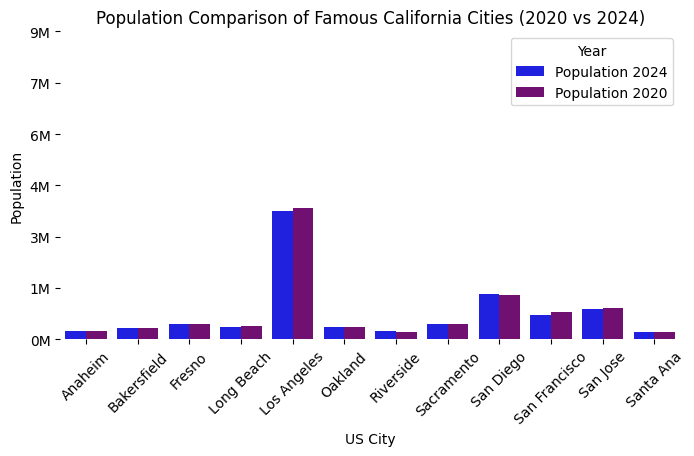

In [26]:


# Melt the pivot table for seaborn plotting
melted_df = pivot_table_famous_ca_cities.melt(id_vars='US City', 
                                              value_vars=['Population 2024', 'Population 2020'], 
                                              var_name='Year', 
                                              value_name='Population')

# Create the grouped bar plot
plt.figure(figsize=(8, 4))
sns.barplot(x='US City', y='Population', hue='Year', data=melted_df, palette=['blue', 'purple'])
plt.title('Population Comparison of Famous California Cities (2020 vs 2024)')
plt.xlabel('US City')
plt.ylabel('Population')
plt.ylim(90000, 9000000)  # Set the y-axis limits
y_min, y_max = plt.ylim()
y_ticks = np.arange(y_min, y_max + 1, (y_max - y_min) / 6)  # Adjust the number of ticks as needed
plt.yticks(y_ticks, [f'{int(tick/1000000):,}M' for tick in y_ticks]) 
plt.xticks(rotation=45)
plt.legend(title='Year')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.savefig('population_comparison.png', dpi=600, bbox_inches='tight')


# Show plot
plt.show()